- 仿真代价函数：$f_i(x_i,\sigma(x))=\frac{1}{2}\|x_i - p_i\|^2 + \frac{1}{2}\|x_i - b\|^2 + \frac{5}{N}\|\sigma(x) - b\|^2$

- 聚合函数：$\sigma(x) = \phi_1(x_1) + \phi_2(x_2) + ... + \phi_n(x_n)$

- 花费函数：$\phi_i(x_i) = \frac{x_i}{n}$

经过1000轮迭代, 最终F(x)收敛到:  18.928149968224147
5.460410964326777
6.474452106565384
6.46199187556817
3.4651883634761007
3.964439187402744

5.165296499467835
5.1652964996407285
5.16529649955192
5.16529649955113
5.165296499367665
5.1652964991853265


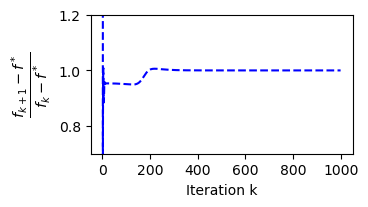

In [24]:
import numpy as np
import matplotlib.pyplot as plt

Iter_Num = 1000
n = 5
x = np.zeros(n)
r = np.zeros(n)
alpha = 0.01
beta = 0.01
v = []
for i in range(n):
    t = []
    for j in range(n):
        if j == i: t.append(1.0)
        else: t.append(0.0)
    v.append(t)
v = np.array(v)
s = x.copy()
y = np.zeros(n)
a = [
    [1/2, 0, 1/2, 0, 0],
    [1/3, 1/3, 0, 0, 1/3],
    [0, 1/2, 1/2, 0, 0],
    [0, 1/2, 0, 1/2, 0],
    [0, 0, 0, 1/2, 1/2]
]
a = np.array(a)
ans_x = [[] for i in range(n)] # 存每个点迭代过程中的x坐标  ans_x[i][tim]
ans_y = [[] for i in range(n)] # 存每个点迭代过程中的y坐标  ans_y[i][tim]
s_x = [[] for i in range(n)] # 存每个点迭代过程中关于x坐标的sigma_i  s_x[i][tim]
s_y = [[] for i in range(n)] # 存每个点迭代过程中关于y坐标的sigma_i  s_y[i][tim]
r1 = [1.0, 4.0, 9.0, 4.0, 8.0] # x坐标
r2 = [6.0, 8.0, 8.0, 2.0, 3.0] # y坐标
r1 = np.array(r1)
r2 = np.array(r2)

xx = x.copy()
vv = v.copy()
ss = s.copy()
yy = s.copy()

#-------------------------------------------------------------------

def get_sigma():
    sum = 0
    for i in range(n):
        sum += x[i]
    sum /= n
    return sum

def upd_x(i):
    xx[i] = x[i] - alpha * ((x[i] - r[i]) + (x[i] - 5) + (1 / n) * (y[i] + 2 * (s[i] - 5) / n / v[i, i]))
    # 下面为使用全局信息的算法
    # sum = 0
    # for j in range(n):
    #     sum += 2 * (get_sigma() - 5) / n
    # xx[i] = x[i] - alpha * ((x[i] - r[i]) + (x[i] - 5) + sum)

def upd_v(i):
    sum = np.zeros(n)
    for j in range(n):
        sum += a[i, j] * v[j]
    vv[i] = sum.copy()

def upd_s(i):
    sum = 0
    for j in range(n):
        sum += a[i, j] * s[j]
    ss[i] = sum + (xx[i] / n) / vv[i, i] - (x[i] / n) / v[i, i]

def upd_y(i):
    sum = 0
    for j in range(n):
        sum += a[i, j] * ss[j]
    yy[i] = y[i] + beta * (ss[i] - sum)

def backup():
    global x, v, s, y
    x = xx.copy()
    v = vv.copy()
    s = ss.copy()
    y = yy.copy()

def init(op):
    global x, r, v, s, y
    global xx, vv, ss, yy
    x = np.random.randint(1, 5, n) # x是(1, 5)的随机数
    x = np.float64(x)
    r = np.zeros(n)
    v = []
    for i in range(n):
        t = []
        for j in range(n):
            if j == i: t.append(1.0)
            else: t.append(0.0)
        v.append(t)
    v = np.array(v)
    s = x.copy()
    for i in range(n):
        s[i] = s[i] / n
    y = np.zeros(n)
    xx = x.copy()
    vv = v.copy()
    ss = s.copy()
    yy = s.copy()

def cal(iter_num):
    sum = 0
    for i in range(n):
        sum += 0.5 * ((ans_x[i][iter_num-1] - r1[i]) ** 2 + (ans_y[i][iter_num-1] - r2[i]) ** 2) + \
               0.5 * ((ans_x[i][iter_num-1] - 5) ** 2 + (ans_y[i][iter_num-1] - 5) ** 2) + \
               ((s_x[i][iter_num-1] - 5) ** 2 + (s_y[i][iter_num-1] - 5) ** 2)
    return sum

def solve(iter_num):
    global r, ans_x, ans_y, s_x, s_y
    init(1)
    r[0] = 1.0
    r[1] = 4.0
    r[2] = 9.0
    r[3] = 4.0
    r[4] = 8.0
    for T in range(iter_num):
        for i in range(n):
            upd_x(i)
            ans_x[i].append(xx[i])
            upd_v(i)
            upd_s(i)
            s_x[i].append(ss[i])
            upd_y(i)
        backup()
    init(2)
    r[0] = 6.0
    r[1] = 8.0
    r[2] = 8.0
    r[3] = 2.0
    r[4] = 3.0
    for T in range(iter_num):
        for i in range(n):
            upd_x(i)
            ans_y[i].append(xx[i])
            upd_v(i)
            upd_s(i)
            s_y[i].append(ss[i])
            upd_y(i)
        backup()

solve(Iter_Num)
print('经过%d轮迭代, 最终F(x)收敛到: ' % Iter_Num, cal(Iter_Num))
sum = 0
for i in range(n):
    print(ans_y[i][Iter_Num - 1])
    sum += ans_y[i][Iter_Num - 1]
print()
print(sum / n)
for i in range(n):
    print(s[i])

# 画相差值
# F* = 18.874999999999645
x_ = [2.95000061364587, 4.450000364870517, 6.949999950244942, 4.449999701469593, 6.449999369769128]
y_ = [5.3999995522043855, 6.399999883904852, 6.399999718054614, 3.400000547305772, 3.9000002985304234]
error = []
import math
# for i in range(Iter_Num - 1):
#     sum1, sum2 = 0, 0
#     for j in range(n):
#         sum1 += math.sqrt((x_[j] - ans_x[j][i + 1]) ** 2 + (y_[j] - ans_y[j][i + 1]) ** 2)
#         sum2 += math.sqrt((x_[j] - ans_x[j][i]) ** 2 + (y_[j] - ans_y[j][i]) ** 2)
#     error.append(sum1 / sum2)
for i in range(Iter_Num - 1):
    error.append(abs(cal(i + 1) - 18.874999999999645) / abs(cal(i) - 18.874999999999645))
plt.xlabel('Iteration k')
plt.ylabel('$\\frac{f_{k+1} - f^*}{f_k - f^*}$', fontsize=15)
plt.ylim((0.7, 1.2))
plt.plot(range(1, Iter_Num), error, color='b', linestyle='dashed')

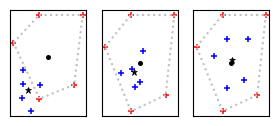

In [43]:
plt.subplot(131)
plt.xticks([])
plt.yticks([])
# 画入侵者
for i in range(n):
    plt.plot(r1[i], r2[i], marker='+', color='r', markersize='5', markeredgewidth=1.1)
plt.plot([r1[0], r1[1]], [r2[0], r2[1]], color='silver', linestyle='dotted')
plt.plot([r1[1], r1[2]], [r2[1], r2[2]], color='silver', linestyle='dotted')
plt.plot([r1[2], r1[4]], [r2[2], r2[4]], color='silver', linestyle='dotted')
plt.plot([r1[4], r1[3]], [r2[4], r2[3]], color='silver', linestyle='dotted')
plt.plot([r1[3], r1[0]], [r2[3], r2[0]], color='silver', linestyle='dotted')
# 画机器人
for i in range(n):
    plt.plot(ans_x[i][0], ans_y[i][0], marker='+', color='b', markersize='5', markeredgewidth=1.1)
# 画人质
plt.plot(5, 5, marker='.', color='black', markersize='5', markeredgewidth=1.1)
# 画中心点
sum_x, sum_y = 0, 0
for i in range(n):
    sum_x += ans_x[i][0]
    sum_y += ans_y[i][0]
plt.plot(sum_x / n, sum_y / n, marker='*', color='black', markersize='5', markeredgewidth=0.5)

# -----------------------------------------------------------------------------------------------------
plt.subplot(132)
plt.xticks([])
plt.yticks([])
# 画入侵者
for i in range(n):
    plt.plot(r1[i], r2[i], marker='+', color='r', markersize='5', markeredgewidth=1.1)
plt.plot([r1[0], r1[1]], [r2[0], r2[1]], color='silver', linestyle='dotted')
plt.plot([r1[1], r1[2]], [r2[1], r2[2]], color='silver', linestyle='dotted')
plt.plot([r1[2], r1[4]], [r2[2], r2[4]], color='silver', linestyle='dotted')
plt.plot([r1[4], r1[3]], [r2[4], r2[3]], color='silver', linestyle='dotted')
plt.plot([r1[3], r1[0]], [r2[3], r2[0]], color='silver', linestyle='dotted')
# 画机器人
for i in range(n):
    plt.plot(ans_x[i][50], ans_y[i][50], marker='+', color='b', markersize='5', markeredgewidth=1.1)
# 画人质
plt.plot(5, 5, marker='.', color='black', markersize='5', markeredgewidth=1.1)
# 画中心点
sum_x, sum_y = 0, 0
for i in range(n):
    sum_x += ans_x[i][50]
    sum_y += ans_y[i][50]
plt.plot(sum_x / n, sum_y / n, marker='*', color='black', markersize='5', markeredgewidth=0.5)

# -----------------------------------------------------------------------------------------------------
plt.subplot(133)
plt.xticks([])
plt.yticks([])
# 画入侵者
for i in range(n):
    plt.plot(r1[i], r2[i], marker='+', color='r', markersize='5', markeredgewidth=1.1)
plt.plot([r1[0], r1[1]], [r2[0], r2[1]], color='silver', linestyle='dotted')
plt.plot([r1[1], r1[2]], [r2[1], r2[2]], color='silver', linestyle='dotted')
plt.plot([r1[2], r1[4]], [r2[2], r2[4]], color='silver', linestyle='dotted')
plt.plot([r1[4], r1[3]], [r2[4], r2[3]], color='silver', linestyle='dotted')
plt.plot([r1[3], r1[0]], [r2[3], r2[0]], color='silver', linestyle='dotted')
# 画机器人
for i in range(n):
    plt.plot(ans_x[i][500], ans_y[i][500], marker='+', color='b', markersize='5', markeredgewidth=1.1)
# 画人质
plt.plot(5, 5, marker='.', color='black', markersize='5', markeredgewidth=1.1)
# 画中心点
sum_x, sum_y = 0, 0
for i in range(n):
    sum_x += ans_x[i][500]
    sum_y += ans_y[i][500]
plt.plot(sum_x / n, sum_y / n, marker='*', color='black', markersize='5', markeredgewidth=0.5)

plt.rcParams['figure.figsize']=(8.5 / 2.54, 3.5 / 2.54)
plt.savefig('fig3.eps')

2. x/y坐标的走势图


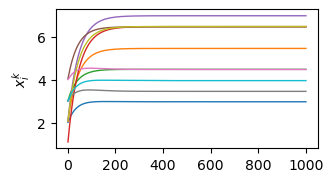

In [36]:
# Fig 2
print('x/y坐标的走势图')
plt.ylabel('$x_i^k$')
for i in range(n):
    plt.plot(range(1, Iter_Num+1), ans_x[i], linestyle='-', linewidth=1)
    plt.plot(range(1, Iter_Num+1), ans_y[i], linestyle='-', linewidth=1)
plt.rcParams['figure.figsize']=(8.58 / 2.54, 4.58 / 2.54)
plt.savefig('fig1.eps')


5.082157550628335
5.1652964996407285
3. x/y坐标sigma的走势图
5.082157550522053 5.16529649955192


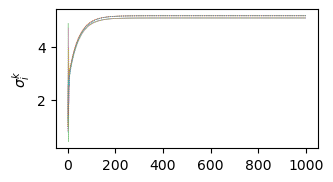

In [47]:
# Fig 3
print(s_x[0][Iter_Num-1])
print(s_y[0][Iter_Num-1])
print('x/y坐标sigma的走势图')
print(s_x[1][Iter_Num - 1], s_y[1][Iter_Num - 1])
plt.ylabel('$\sigma_i^k$')
# plt.ylim(4.8,5.2)
for i in range(n):
    plt.plot(range(1, Iter_Num + 1), s_x[i], linestyle='dotted', linewidth=0.5)
    plt.plot(range(1, Iter_Num + 1), s_y[i], linestyle='dotted', linewidth=0.5)
plt.rcParams['figure.figsize']=(8.58 / 2.54, 4.58 / 2.54)
plt.savefig('fig2.eps')